<a href="https://colab.research.google.com/github/FranciaAlday/Proyectos/blob/main/PPCienciaDatos/Clases/20_23OctCorr_SeriesT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Correlación

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
cont = pd.read_csv('https://bit.ly/31B56KB')
cont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Contaminacion_SO2  41 non-null     int64  
 1   Temperatura        41 non-null     float64
 2   Fabricas           41 non-null     int64  
 3   Habitantes         41 non-null     int64  
 4   Velocidad_viento   41 non-null     float64
 5   Lluvia             41 non-null     float64
 6   Dias_Lluvia        41 non-null     int64  
dtypes: float64(3), int64(4)
memory usage: 2.4 KB


In [ ]:
cont.head()

,Contaminacion_SO2,Temperatura,Fabricas,Habitantes,Velocidad_viento,Lluvia,Dias_Lluvia
0,10,70.3,213,582,6.0,7.05,36
1,13,61.0,91,132,8.2,48.52,100
2,12,56.7,453,716,8.7,20.66,67
3,17,51.9,454,515,9.0,12.95,86
4,56,49.1,412,158,9.0,43.37,127


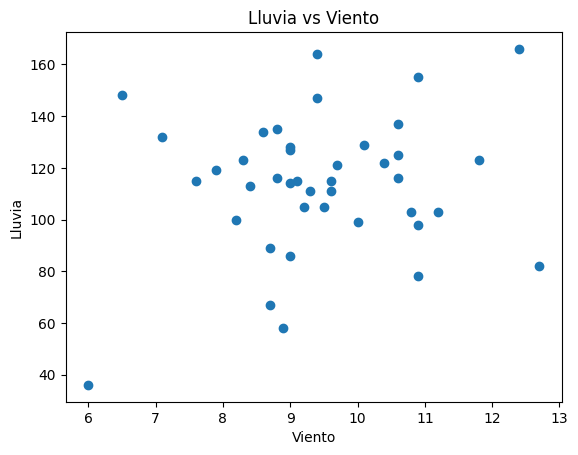

In [ ]:
plt.scatter(cont.Velocidad_viento, cont.Dias_Lluvia )
plt.title('Lluvia vs Viento')
plt.xlabel('Viento')
plt.ylabel('Lluvia')
plt.show()

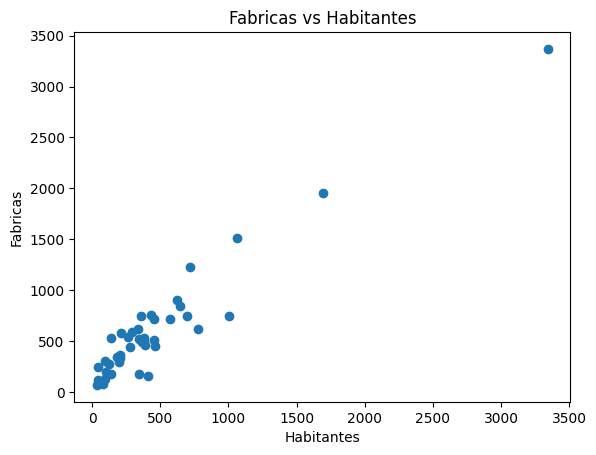

In [ ]:
plt.scatter(cont.Fabricas, cont.Habitantes) # tiene outliers
plt.title('Fabricas vs Habitantes')
plt.xlabel('Habitantes')
plt.ylabel('Fabricas')
plt.show()

## pairplot

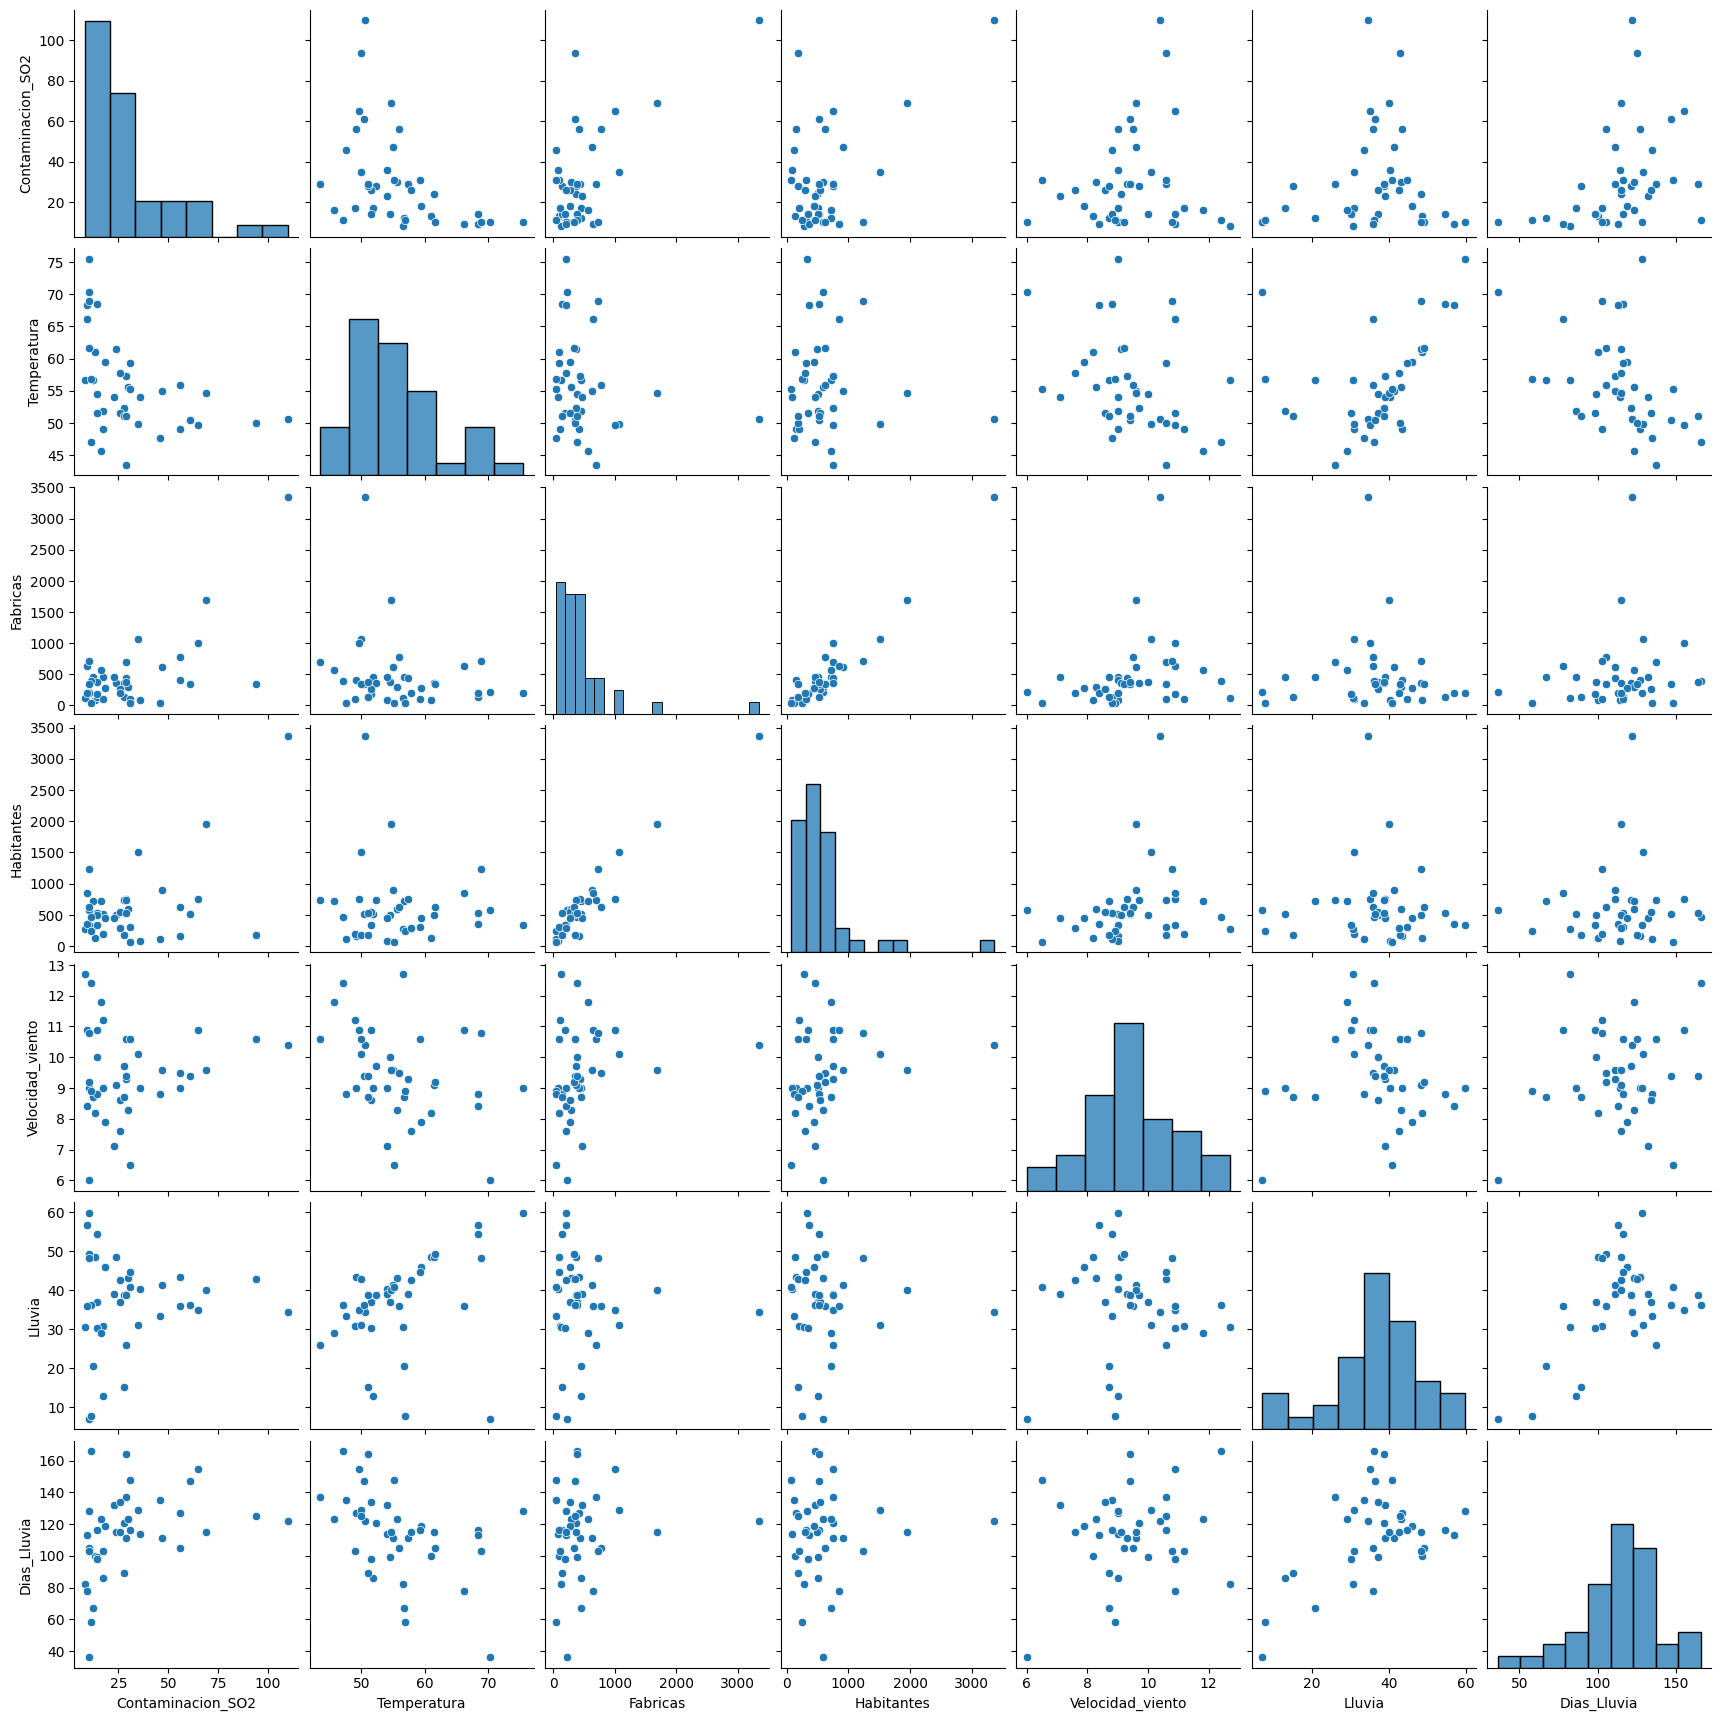

In [ ]:
import seaborn as sns
sns.pairplot(cont)

Fenómenos o cosas hechas por humanos es probable que no tengan distribución normal.

Fenómenos de la naturaleza es probable que tengan distribución normal.

## Pruebas de normalidad

In [ ]:
# Prueba de normalidad 1
data = np.random.normal(0,1,100)

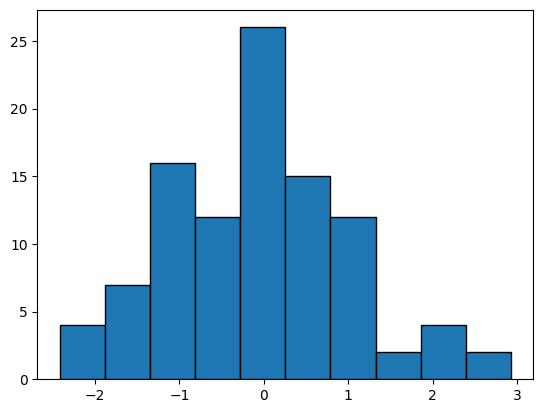

In [ ]:
plt.hist(data, edgecolor='black', linewidth=1)
plt.show()

### Gráfica de Cuantiles

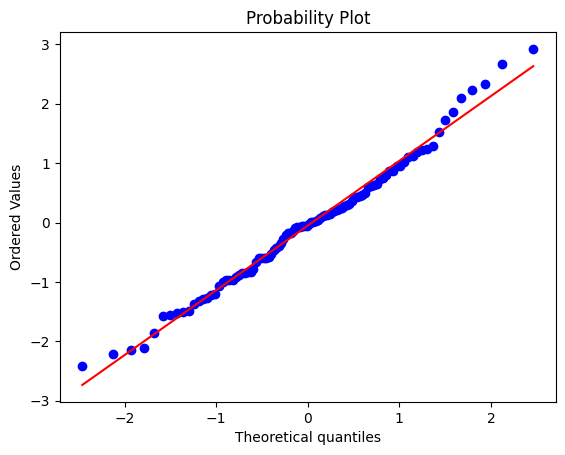

In [ ]:
# Prueba de normalidad 2
# Gráfica de Cuantiles
import pylab
import scipy.stats as stats

stats.probplot(data, dist='norm', plot=pylab)
pylab.show()

####  si los puntoss de los datos no oscilan sobre la recta, entonces los datos se distribuyen de manera normal
####  si no se comportan como la recta entonces la distribucion de lo datos no es tan parecida a una normal

### Prueba de Shapiro

In [ ]:
# Prueba de normalidad 3
# Prueba de Shapiro
from scipy.stats import shapiro

strad, p_value = shapiro(data)
# p_value > 0.05 => distribución normal
print('p_value = ',p_value)

####  si el p-valor obtenido es mayor de 0.05, se puede concluir
####  que los datos siguen una distribución normal y no hay evidencia
####  suficiente para rechazar la hipótesis nula de normalidad

p_value =  0.5366384983062744


In [ ]:
stats.probplot(cont.Velocidad_viento,dist='norm',plot=pylab);

In [ ]:
estad, p_value = shapiro(cont.Velocidad_viento)
print('p_value: ',p_value)

## si se distribuye de manera normal

In [ ]:
# Contaminacion SO2
stats.probplot(cont.Contaminacion_SO2,dist='norm',plot=pylab);

In [ ]:
# Shapiro
estad, p_value = shapiro(cont.Contaminacion_SO2)
print('p_value = ',p_value)

p_value =  9.723309631226584e-06


## Tabla Correlación

In [ ]:
# Correlación: como no todas las variables tienen correlación normal
# NO SE PUEDE usar PEARSON
cont_corr = cont.corr(method='spearman')
cont_corr

,Contaminacion_SO2,Temperatura,Fabricas,Habitantes,Velocidad_viento,Lluvia,Dias_Lluvia
Contaminacion_SO2,1.000000,-0.538831,0.264051,0.089470,0.047309,-0.002616,0.517709
Temperatura,-0.538831,1.000000,-0.225629,0.031362,-0.398282,0.498650,-0.505730
Fabricas,0.264051,-0.225629,1.000000,0.822997,0.394193,-0.151568,0.145266
Habitantes,0.089470,0.031362,0.822997,1.000000,0.337431,-0.130314,0.010108
Velocidad_viento,0.047309,-0.398282,0.394193,0.337431,1.000000,-0.256605,0.034454
Lluvia,-0.002616,0.498650,-0.151568,-0.130314,-0.256605,1.000000,0.242342
Dias_Lluvia,0.517709,-0.505730,0.145266,0.010108,0.034454,0.242342,1.000000


<Axes: >

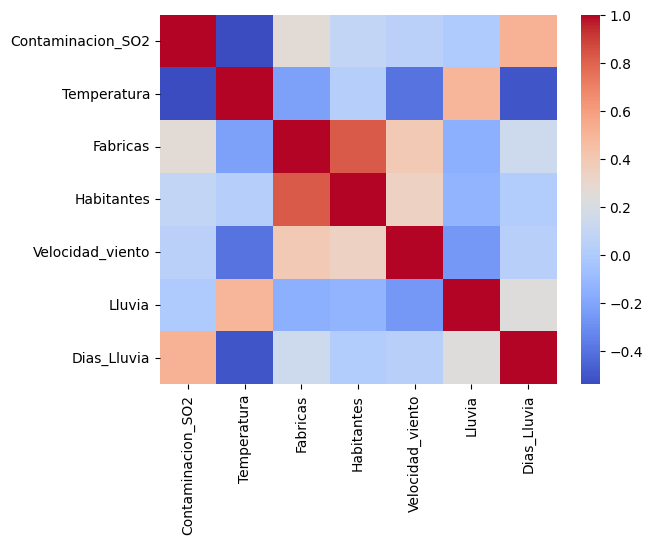

In [ ]:
# Mapa de calor de las correlaciones
sns.heatmap(cont_corr, xticklabels=cont_corr.columns, yticklabels=cont_corr.columns, cmap='coolwarm')

# Series de tiempo

Análisis de tiempo

Media movil

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Estadísticas para Time Series
# aplication programming intarface (es una forma de comunicarnos con algo , para invocar lo que pidamos dentro de eso)
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

In [ ]:
# Conjuntos de datos por hora
ads = pd.read_csv('https://bit.ly/2l9BdhA', index_col=['Time'], parse_dates=['Time'])
ads.head()

,Ads
Time,
2017-09-13 00:00:00,80115
2017-09-13 01:00:00,79885
2017-09-13 02:00:00,89325
2017-09-13 03:00:00,101930
2017-09-13 04:00:00,121630


In [ ]:
# Compras dentro de videojuegos por día
cur = pd.read_csv('https://bit.ly/2lLao3B', index_col=['Time'], parse_dates=['Time'])
cur.head()

,GEMS_GEMS_SPENT
Time,
2017-05-01,1199436
2017-05-02,1045515
2017-05-03,586111
2017-05-04,856601
2017-05-05,793775


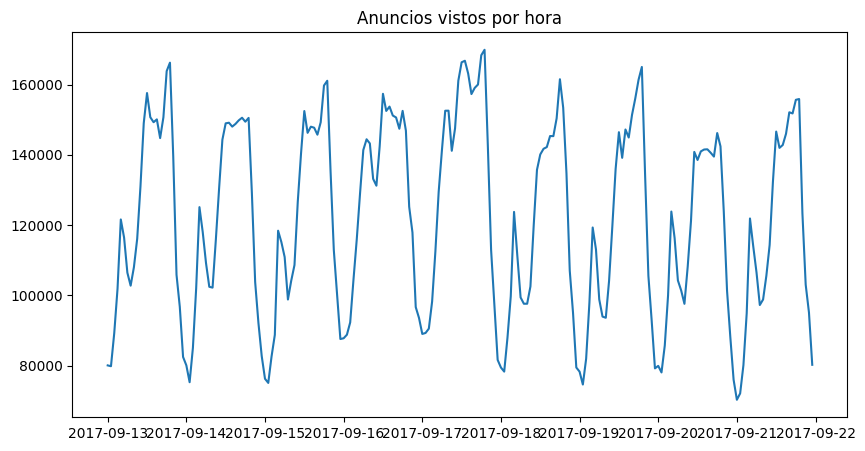

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(ads.Ads)
plt.title('Anuncios vistos por hora')
plt.show()

Vertical son los anuncios vistos y la horizontal va por día pero esto se grafica por hora, nos dice que en la noche la gente no ve anuncios (están dormidos) y empieza a subir al medio día

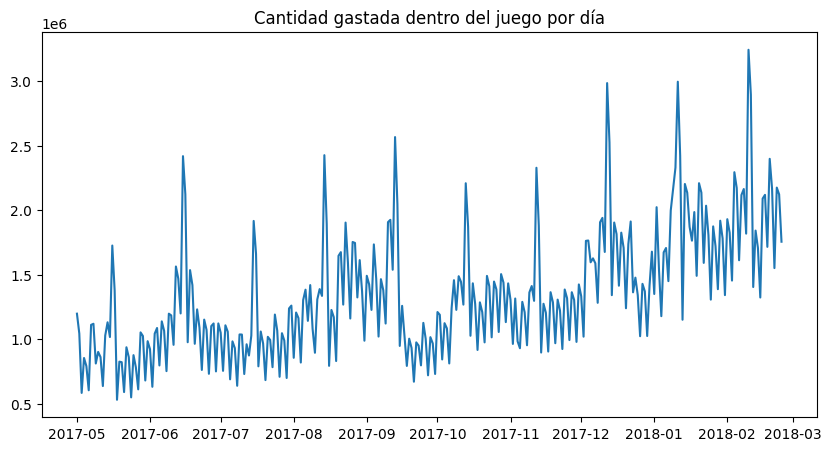

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(cur.GEMS_GEMS_SPENT)
plt.title('Cantidad gastada dentro del juego por día')
plt.show()

## Función de correlación

In [ ]:
# Conjunto de datos que esta en la api statsmodels
data = sm.datasets.sunspots.load_pandas().data
data.tail()

,YEAR,SUNACTIVITY
304,2004.0,40.4
305,2005.0,29.8
306,2006.0,15.2
307,2007.0,7.5
308,2008.0,2.9


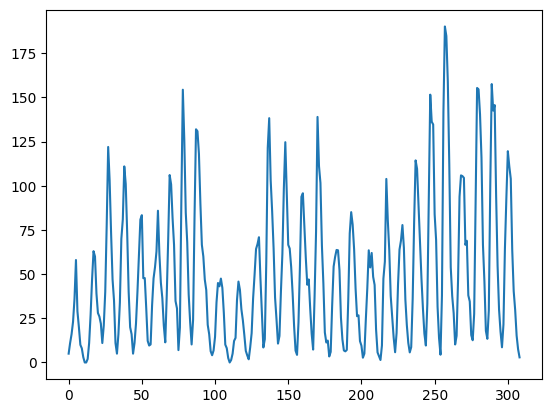

In [ ]:
data.SUNACTIVITY.plot()
plt.show()

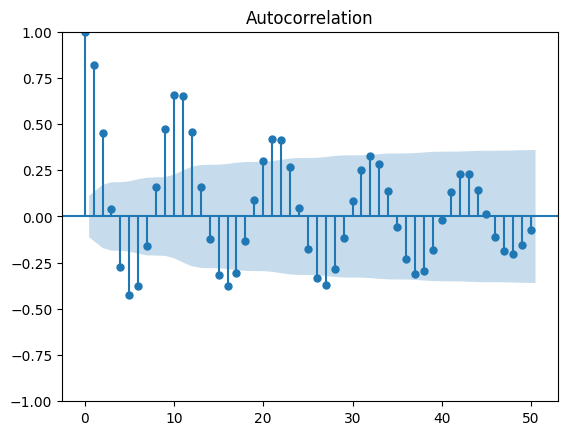

In [ ]:
sm.graphics.tsa.plot_acf(data.SUNACTIVITY.values, lags=50)
plt.show()

La región azul indica el intervalo de confianza, los que caen fuera son valores con alta correlación, los que caen dentro de la zona ya no tienen correlación con el dato actual.

Por arriba de la línea es correlación positiva y por debajo del la línea es correlación negativa.

Eventualmente deben de estabilizarse en la zona como en la gráfica porque también la zona se va elvando y así hay estabilidad en los datos

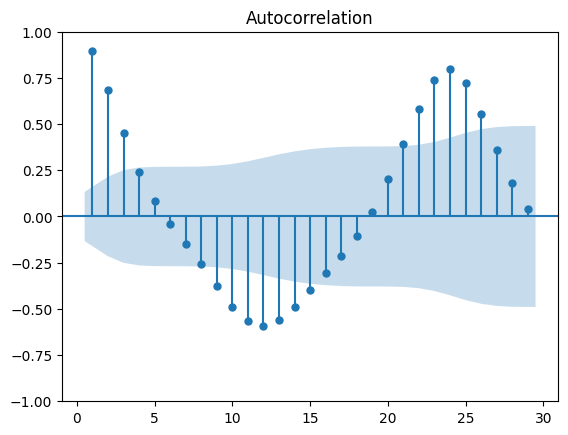

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
fig = plot_acf(ads.Ads, lags=range(1,30))

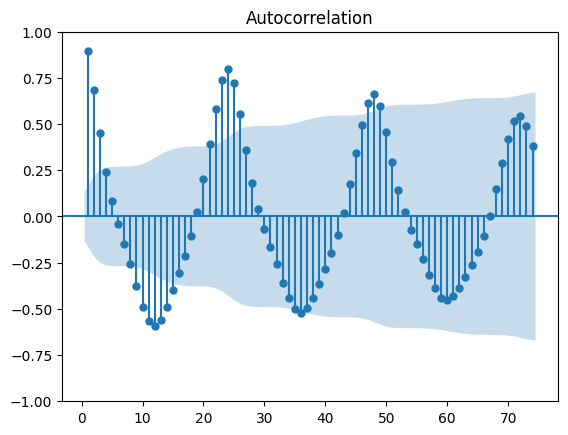

In [ ]:
from matplotlib.pylab import plot
fig = plot_acf(ads.Ads, lags=range(1,75))

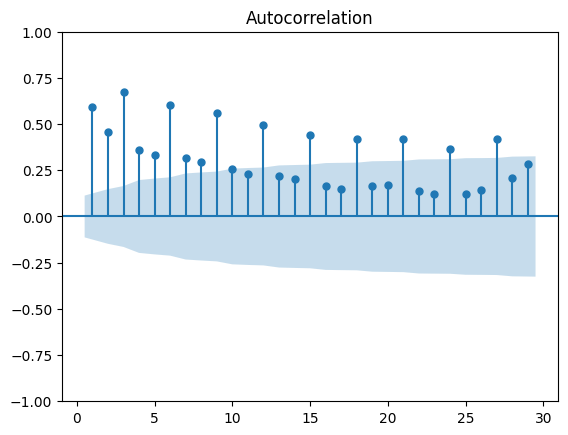

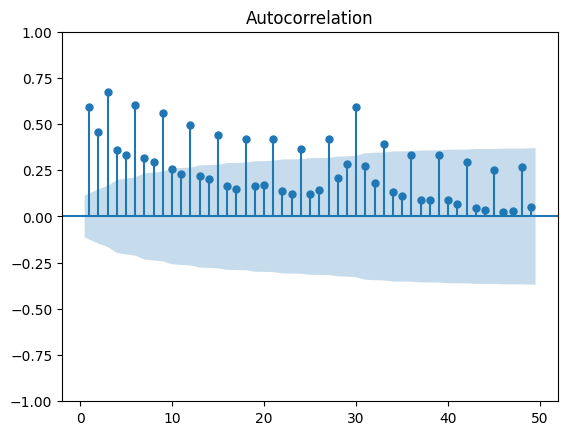

In [ ]:
fig = plot_acf(cur.GEMS_GEMS_SPENT, lags=range(1,30))
fig = plot_acf(cur.GEMS_GEMS_SPENT, lags=range(1,50))

Este no oscila a valores negativos, en el caso de las compras la correlación simepre es positiva

Esta gráfica nos sirve para ver que sí podemos hacer el análisis y qué valores de correlación son buenos, casi siempre se utilizan los primeros y después si algunos salen de la zona como en este caso talvez por el 30 podemos usar ese dato con mucha precaución.

Cuando se quedan dentro de la zona (después de un tiempo de estabilizarse) nos dice que podemos usar series de tiempo.

Si no caen dentro de la zona (despues de un tiempo) puede ser un proceso estacionario y sólo se sacaría la media no la media móvil

## Media móvil

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
def moving_average(series,n):
  '''Calcula la media de las ultimas n observaciones'''
  return np.average(series[-n:])

moving_average(ads,24)

116805.0

In [ ]:
def mean_absolute_percentage_error(y_true,y_pred):
  return np.mean(np.abs((y_true - y_pred)/y_true ))*100

In [ ]:
def plot_moving_average(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):
  """series = dataframe con la series de tiempo
    window = tamaño de la ventana
    plot_intervals = bandera para mostrar intervalos de confianza
    scale = escla para los intervalos de confianza
    plot_anomalies = bandera para mostrar anomalías """

  rolling_mean = series.rolling(window=window).mean() # Pandas
  plt.figure(figsize=(8,4))
  plt.title('Media movil \n tamaño de la ventana = {}'.format(window))
  plt.plot(rolling_mean, 'g', label='Tendencia por media móvil')

  if plot_intervals: # todo es vectorizado, se aplica para cada ventana
    mae = mean_absolute_error(series[window:], rolling_mean[window:])
    deviation = np.std(series[window:] - rolling_mean[window:])
    low_ = rolling_mean - (mae + scale * deviation)
    upp_ = rolling_mean + (mae + scale * deviation)
    plt.plot(upp_, 'r--', label='Límites inferior/superior')
    plt.plot(low_, 'r--')

    if plot_anomalies:
      anom = pd.DataFrame(index=series.index, columns=series.columns)
      anom[series<low_] = series[series<low_]
      anom[series>upp_] = series[series>upp_]
      plt.plot(anom, 'ro', markersize=10)

  plt.plot(series[window:], label='Valores reales')
  plt.legend(loc='best')
  plt.xticks(rotation=30)
  plt.show()

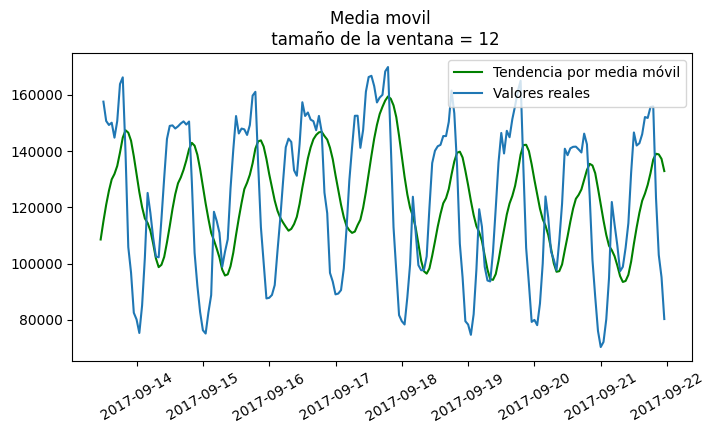

In [ ]:
plot_moving_average(ads, 12)

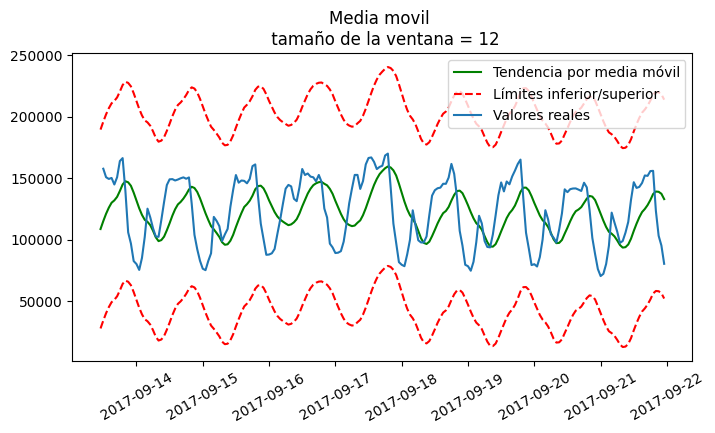

In [ ]:
plot_moving_average(ads, 12, plot_intervals=True)

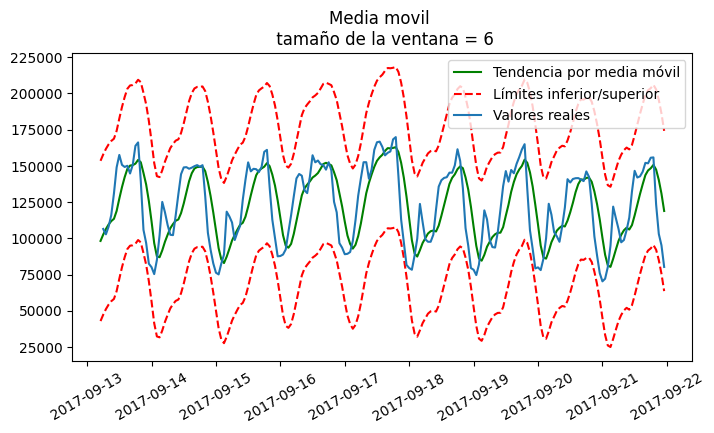

In [ ]:
plot_moving_average(ads, 6, plot_intervals=True, plot_anomalies=True)

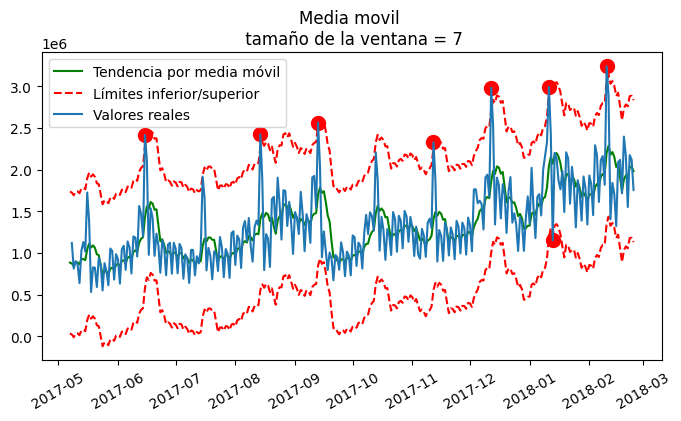

In [ ]:
plot_moving_average(cur, 7, plot_intervals=True, plot_anomalies=True)

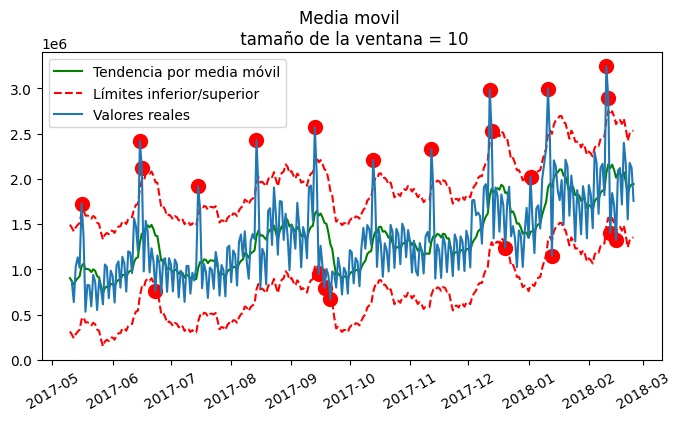

In [ ]:
plot_moving_average(cur,10,plot_intervals=True,plot_anomalies=True,scale=1)

Los puntos rojos son las anomalías

## Media con pesos

In [ ]:
#Media con pesos (k-vecinos)
def weighted_average(series, weights):
    result = 0.0
    for n in range(len(weights)):
        result += series.iloc[-n-1]*weights[n]
    return result

In [ ]:
print(ads.tail(3))
weighted_average(ads, [0.6, 0.3, 0.1])

                        Ads
Time                       
2017-09-21 21:00:00  103080
2017-09-21 22:00:00   95155
2017-09-21 23:00:00   80285


Ads    87025.5
Name: 2017-09-21 23:00:00, dtype: float64

In [ ]:
#Suavizado exponencial
def exponential_smothing(series, alpha):
    """ alpha: parámetro de suavizado (0.0 - 1.0) """
    result = [series[0]] #El primer valor es el más reciente
    for n in range(1,len(series)):
        result.append(alpha*series[n] + (1-alpha)*result[n-1])
    return result

In [ ]:
#Gráfica
def plot_exponential_smoothing(series, alphas):
    """ Muestra el suavizado exponencial para diferentes valores de alpha
        alphas: lista de valores del parámetro """
    with plt.style.context('seaborn-dark'):
        plt.figure(figsize = (15,7))
        for alpha in alphas:
            plt.plot(exponential_smothing(series, alpha),
                     label = 'Alpha = {}'.format(alpha))
        plt.plot(series.values, 'c', label = 'Real')
        plt.legend(loc = 'best')
        plt.title('Suavizado exponencial')
        plt.grid(True)
        plt.show()

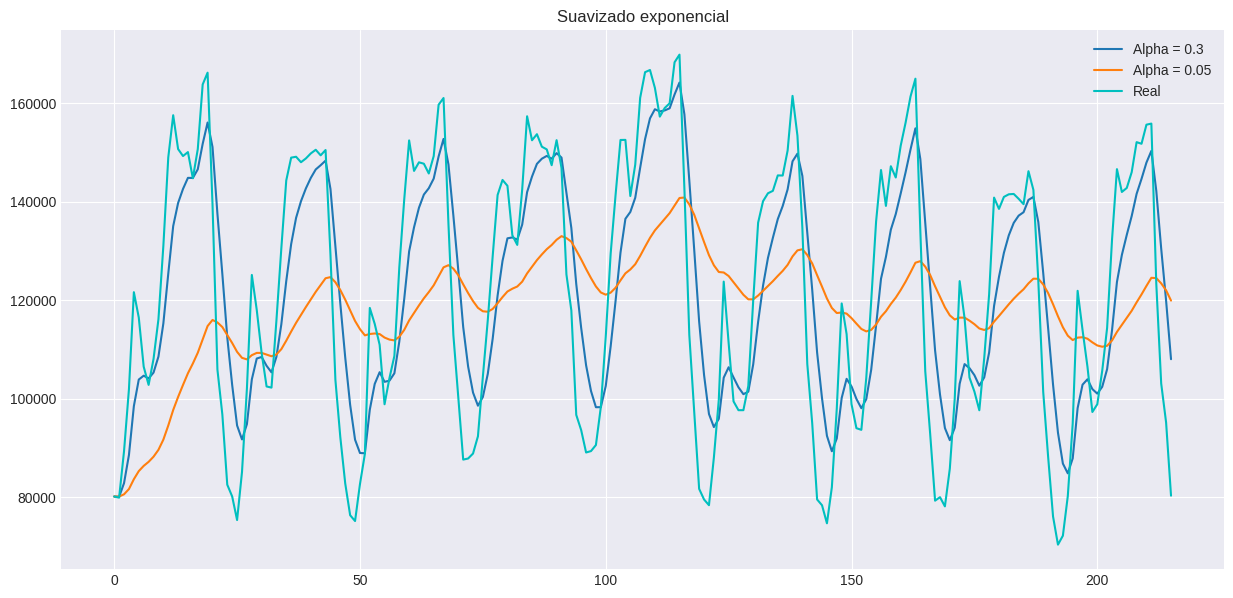

In [ ]:
## Si el alpha es mas grande, nos habla de tendencias a largo plazo
plot_exponential_smoothing(ads.Ads, [0.3, 0.05])

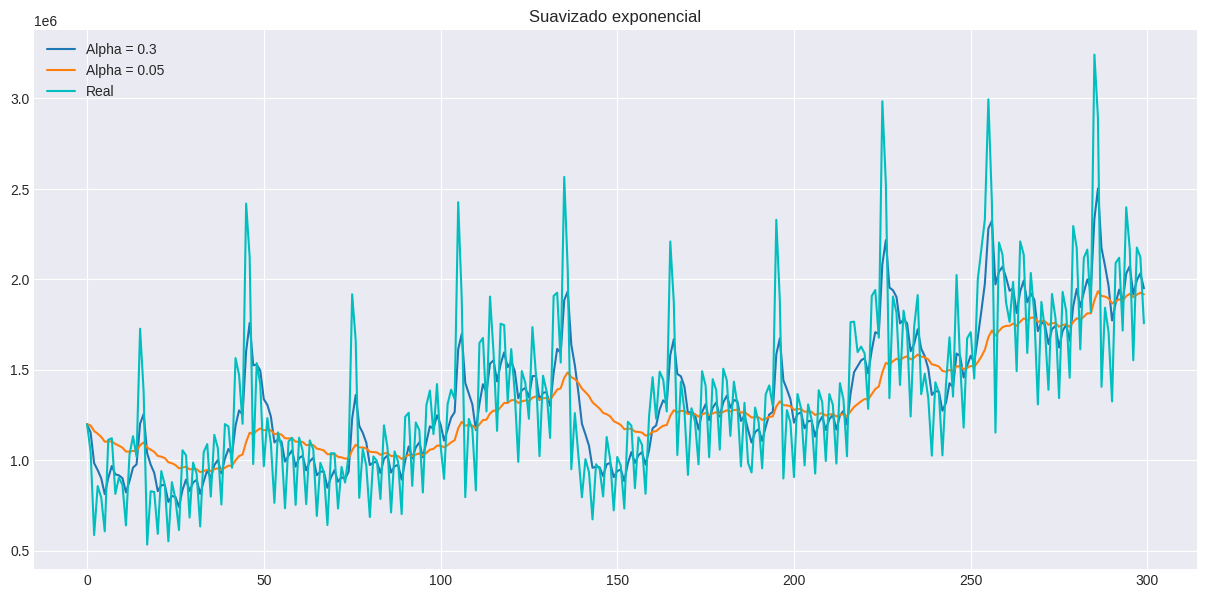

In [ ]:
plot_exponential_smoothing(cur.GEMS_GEMS_SPENT, [0.3,0.05])

##Holt-Winters

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing

def plot_exp(series,alpha):
  es1 = ExponentialSmoothing((series), seasonal_periods=12,
                             trend='add',seasonal='add').fit()
  ## pronostico
  es2 = es1.forecast(len(series)/4)
  series.plot(kind='line',figsize=(15,7))
  es2.plot(kind='line')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


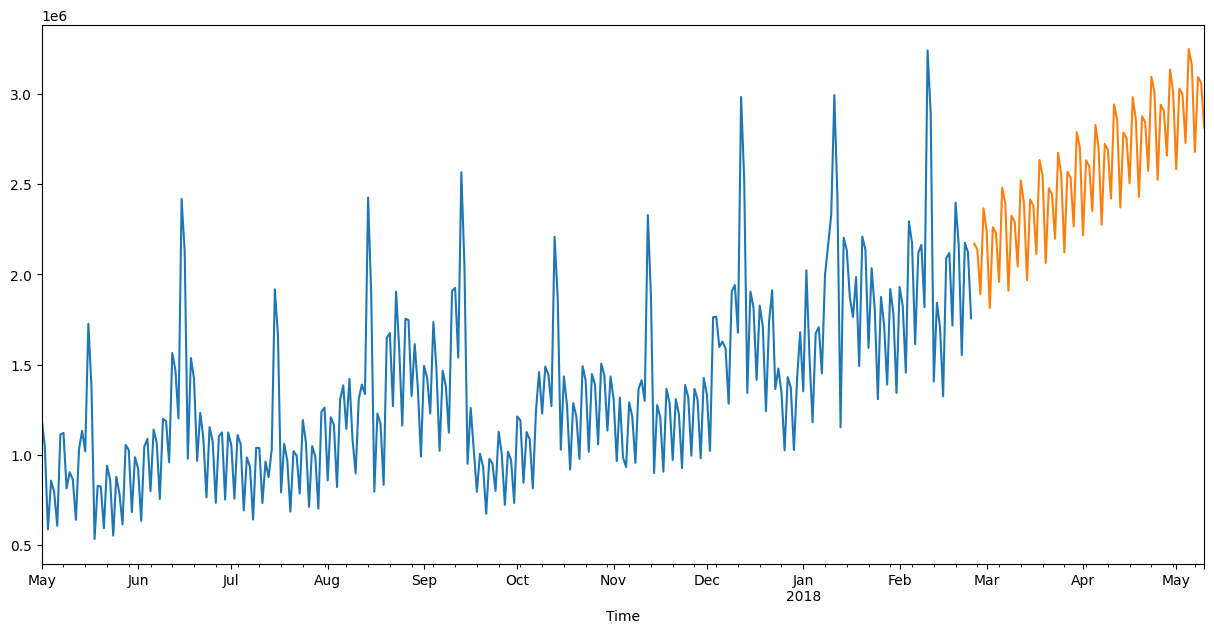

In [ ]:
plot_exp(cur.GEMS_GEMS_SPENT,.3)

In [ ]:
## Holt-Winters
from statsmodels.tsa.holtwinters import ExponentialSmoothing

def plot_hw_smoothing(series,n=20):
  hw = ExponentialSmoothing((series), seasonal_periods=12).fit()
  ## prediccion
  train, test = series[:-n], series[len(series)-n-1:]
  hw_pred = hw.predict(start=test.index[0], end=test.index[-1])
  plt.figure(figsize=(15,7))
  plt.plot(train.index,train, label='Entrenamiento')
  plt.plot(test.index,test, label='Prueba')
  plt.plot(hw_pred.index,hw_pred,label='Holt-Winters')
  plt.legend(loc='best')
  plt.grid(True);

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


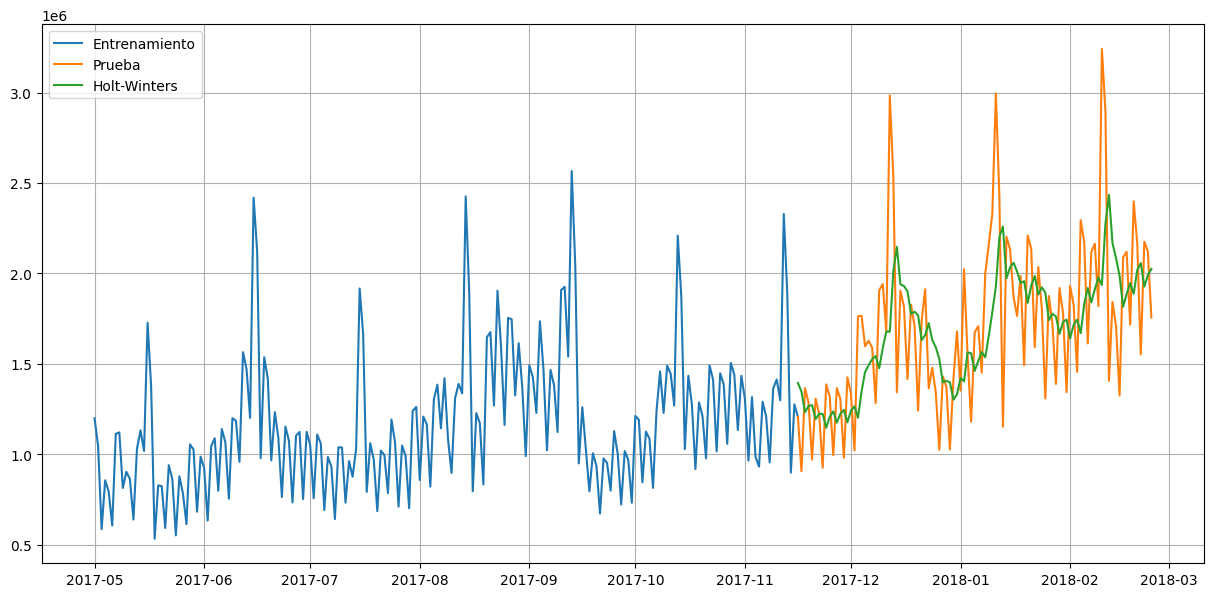

In [ ]:
plot_hw_smoothing(cur.GEMS_GEMS_SPENT,100)

In [ ]:
data = pd.DataFrame(ads.Ads.copy())
data.columns = ['y']
data

,y
Time,
2017-09-13 00:00:00,80115
2017-09-13 01:00:00,79885
2017-09-13 02:00:00,89325
2017-09-13 03:00:00,101930
2017-09-13 04:00:00,121630
...,...
2017-09-21 19:00:00,155890
2017-09-21 20:00:00,123395
2017-09-21 21:00:00,103080


In [ ]:
## crear el retreaso de la variable objetico desde 6 a 24
for i in range(6,25):
  data['lag_{}'.format(i)] = data.y.shift(i)
data.head(10)

,y,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24
Time,,,,,,,,,,,,,,,,,,,,
2017-09-13 00:00:00,80115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-13 01:00:00,79885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-13 02:00:00,89325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-13 03:00:00,101930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-13 04:00:00,121630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-13 05:00:00,116475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-13 06:00:00,106495,80115.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-13 07:00:00,102795,79885.0,80115.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-13 08:00:00,108055,89325.0,79885.0,80115.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
## dividir el conjunto
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score

## time series cross validation con 5 pliegues, 4 entrenamiento y 1 de prueba
tscv = TimeSeriesSplit(n_splits=5)

In [ ]:
def timeseries_train_test_split(X,y,test_size):
  test_index = int(len(X)*(1-test_size) )
  X_train,y_train = X.iloc[:test_index], y.iloc[:test_index]
  X_test,y_test = X.iloc[test_index:], y.iloc[test_index:]
  return X_train,X_test,y_train,y_test

In [ ]:
## Preprocesamiento de los datos
y = data.dropna().y
X = data.dropna().drop(['y'],axis=1)

## 30% de prueba
X_train,X_test,y_train,y_test = timeseries_train_test_split(X,y,test_size=0.3)

X_train.head()

,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24
Time,,,,,,,,,,,,,,,,,,,
2017-09-14 00:00:00,163840.0,150690.0,144780.0,150100.0,149295.0,150715.0,157590.0,149020.0,131030.0,116125.0,108055.0,102795.0,106495.0,116475.0,121630.0,101930.0,89325.0,79885.0,80115.0
2017-09-14 01:00:00,166235.0,163840.0,150690.0,144780.0,150100.0,149295.0,150715.0,157590.0,149020.0,131030.0,116125.0,108055.0,102795.0,106495.0,116475.0,121630.0,101930.0,89325.0,79885.0
2017-09-14 02:00:00,139520.0,166235.0,163840.0,150690.0,144780.0,150100.0,149295.0,150715.0,157590.0,149020.0,131030.0,116125.0,108055.0,102795.0,106495.0,116475.0,121630.0,101930.0,89325.0
2017-09-14 03:00:00,105895.0,139520.0,166235.0,163840.0,150690.0,144780.0,150100.0,149295.0,150715.0,157590.0,149020.0,131030.0,116125.0,108055.0,102795.0,106495.0,116475.0,121630.0,101930.0
2017-09-14 04:00:00,96780.0,105895.0,139520.0,166235.0,163840.0,150690.0,144780.0,150100.0,149295.0,150715.0,157590.0,149020.0,131030.0,116125.0,108055.0,102795.0,106495.0,116475.0,121630.0


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

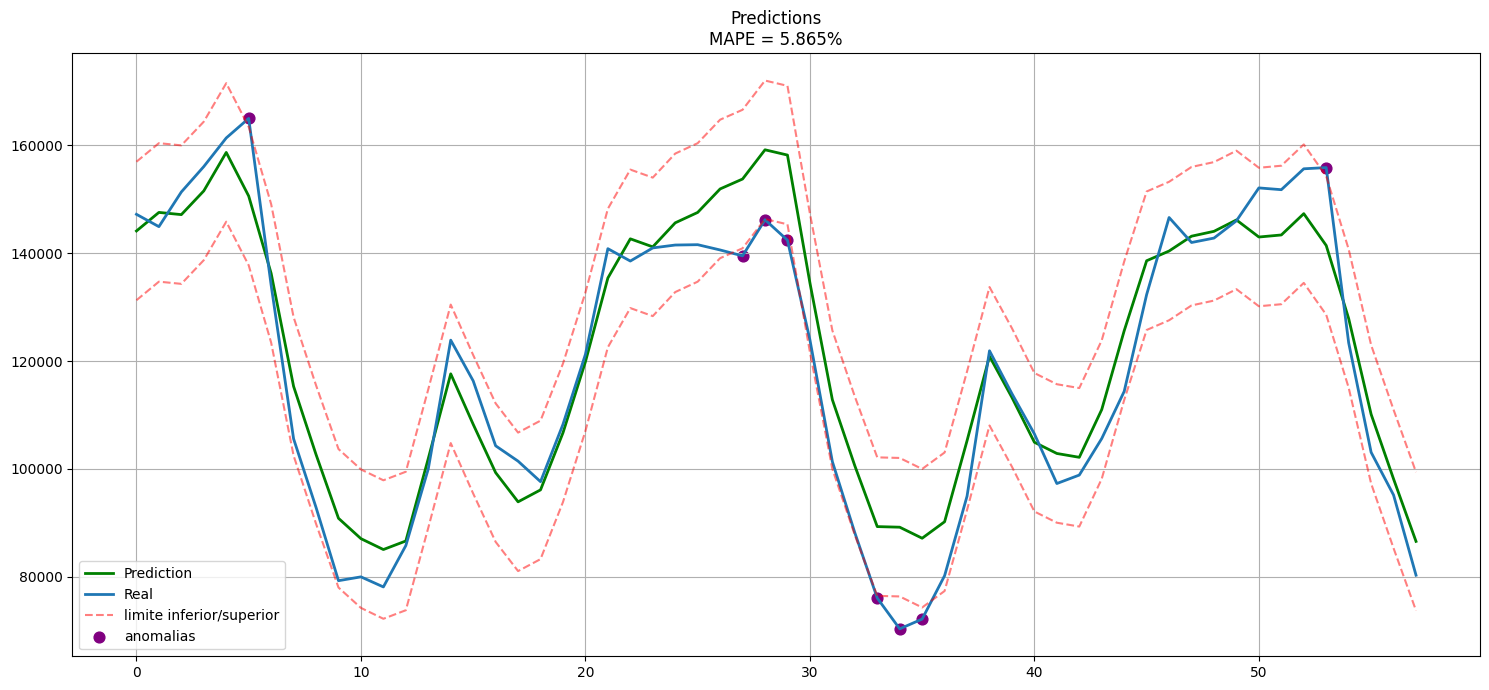

In [ ]:
def plot_lr_ts(model,X_train,X_test,y_train,y_test,
               plot_intervals=False,plot_anomalies=False,scale=1.96):

  pred = model.predict(X_test)
  plt.figure(figsize=(15,7))
  plt.plot(pred,'g',label='Prediction',linewidth=2)
  plt.plot(y_test.values,label='Real',linewidth=2)

  if plot_intervals:
    cv = cross_val_score(model,X_train,y_train,
                         cv = tscv,scoring='neg_mean_absolute_error')
    mae = cv.mean()*(-1)
    dev = cv.std()
    low = pred-(mae + dev*scale)
    sup = pred + (mae + dev*scale)

    plt.plot(low,'r--',label='limite inferior/superior',alpha=0.5)
    plt.plot(sup,'r--',alpha=0.5)

  if plot_anomalies:
    p_ = pd.DataFrame(y_test.values)
    p_low = p_[y_test.values<=low]
    p_sup = p_[y_test.values>= sup]
    plt.scatter(p_sup.index,p_sup,s=60,c='purple',label='anomalias')
    plt.scatter(p_low.index,p_low,s=60,c='purple')


  error = mean_absolute_percentage_error(pred,y_test)
  plt.title(f'Predictions\nMAPE = {error:.3f}%')
  plt.legend(loc='best')
  plt.tight_layout()
  plt.grid(True);


def plot_coefficients(model):
  coefs = pd.DataFrame(model.coef_, # data
                       X_train.columns) #indexes
  coefs.columns=['coef']
  coefs['abs'] = coefs.coef.apply(np.abs)
  coefs  = coefs.sort_values(by='abs',ascending=False).drop(['abs'],axis=1)
  plt.figure(figsize=(15,7))
  coefs.coef.plot(kind='bar')
  plt.grid(True,axis='y')
  plt.hlines(y=0,xmin=0,xmax=len(coefs),linestyles='dashed');


plot_lr_ts(lr,X_train,X_test,y_train,y_test,plot_intervals=True,plot_anomalies=True,scale=.1)

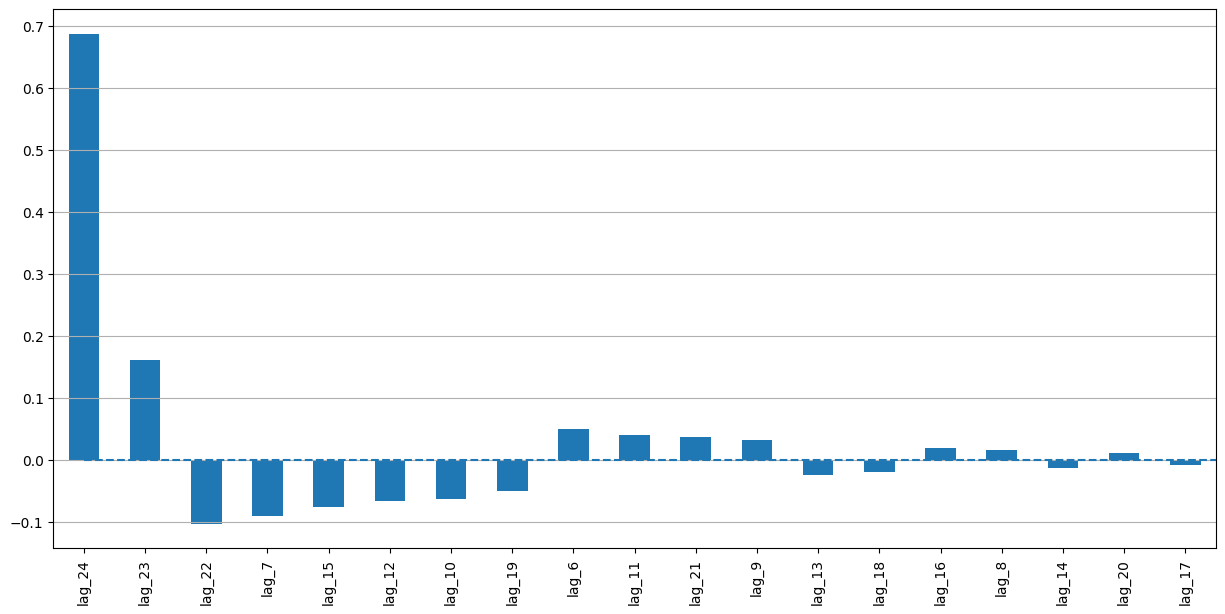

In [ ]:
plot_coefficients(lr)